In [315]:
import cPickle as pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, precision_recall_curve
#import seaborn

In [2]:
def open_prepper(file_path):
    """Open the DataPrepper from pickled file."""
    with open(file_path) as f:
        prepper = pickle.load(f)
    return prepper

In [3]:
def custom_hist(array, lower, upper, nbins):
    """Get histogram of values.

    PARAMETERS
    ----------
    channel_array : 1D or 2D numpy array
        Raw data values.

    lower : int
        Lower limit of data values allowed.

    upper : int
        Upper limit of data values allowed.

    nbins : int
        Number of bins to put data into.

    RETURNS
    -------
    counts : list
        A list of the counts of values in each bin.
    """
    values = array.astype(int).flatten()
    data = np.round(values, decimals=0).astype(float)
    bin_width = ((upper+1) - lower)/float(nbins)
    steps = np.arange(lower, upper+1+bin_width, bin_width)[0:nbins+1]
    hist, edges = np.histogram(data, bins=steps)
    return list(hist)

In [4]:
file_path = '../data/store/data_prepper_ALL-CATEGORIES.pkl'
prepper = open_prepper(file_path)

In [5]:
X_train, y_train = prepper.return_training_data()

In [6]:
X_test, y_test = prepper.return_testing_data()

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [7]:
X_combined = pd.concat((X_train, X_test), axis=0)

In [8]:
y_combined = pd.concat((y_train, y_test), axis=0)

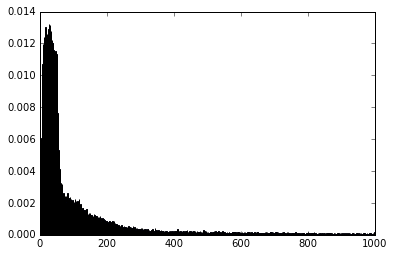

In [362]:
views = y_train['image_views']
views_hist,bins,_ = plt.hist(views, bins=1000, range=(0, 1000), normed=True)

In [ ]:
views_hist.shape

In [ ]:
bins.shape

In [ ]:
i = 21
j = 40

In [363]:
cmap = ['skyblue','tomato','mediumseagreen','lightslategrey', 'y']

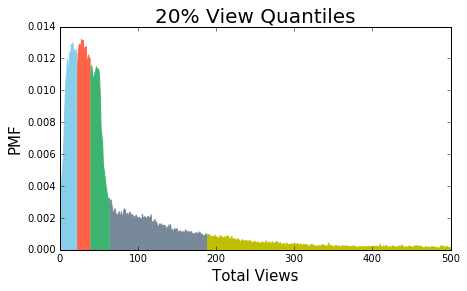

In [370]:
plt.figure(figsize=(7, 4))
for i, j, color in zip(limits[:-1], limits[1:], cmap):
    div = (bins[:-1]<=j) & (bins[:-1]>i)
    plt.fill_between(bins[:-1][div], 0, views_hist[div], color=color)
plt.title('20% View Quantiles', fontsize=20)
plt.ylabel("PMF", fontsize=15)
plt.xlabel("Total Views", fontsize=15)
# plt.tick_params(
#     axis='y',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     left='off',      # ticks along the bottom edge are off
#     right='off',         # ticks along the top edge are off
#     labelleft='off') # labels along the bottom edge are off
plt.xlim((0, 500))
plt.savefig('visuals/20PercentHist.jpg', dpi=300)

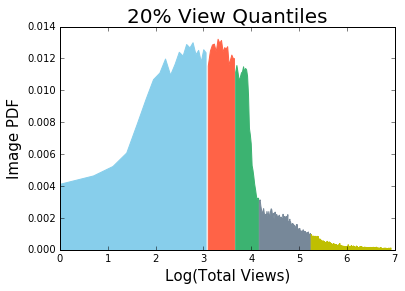

In [369]:
plt.figure(figsize=(6, 4))
for i, j, color in zip(limits[:-1], limits[1:], cmap):
    div = (bins[:-1]<=j) & (bins[:-1]>i)
    plt.fill_between(np.log(bins)[:-1][div], 0, views_hist[div], color=color)
plt.title('20% View Quantiles', fontsize=20)
plt.ylabel("Image PDF", fontsize=15)
plt.xlabel("Log(Total Views)", fontsize=15)
# plt.tick_params(
#     axis='y',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     left='off',      # ticks along the bottom edge are off
#     right='off',         # ticks along the top edge are off
#     labelleft='off') # labels along the bottom edge are off
# plt.xlim((0, 800))
plt.savefig('visuals/Log20PercentHist.jpg', dpi=300)

In [364]:
limits = []
n=5
quantiles = np.arange(0, n+1)/float(n)
for i, quant in enumerate(quantiles):
    limits.append(views.quantile(quant))
limits
# log_limits = np.log(limits)

[0.0, 21.0, 38.0, 63.0, 188.0, 83589.0]

In [365]:
limits

[0.0, 21.0, 38.0, 63.0, 188.0, 83589.0]

In [ ]:
log_views = np.log(views)
hist_views = np.hist

In [ ]:
for i, lim in enumerate(limits[:-1]):
    plt.hist(log_views[(views>limits[i]) & (views<=limits[i+1])], bins=(np.round(limits[i+1]-limits[i])))
plt.show()

### ALL-CATEGORIES MODELING

In [9]:
model_class_all_cats = open_prepper('classification_model_GBC_ALL-CATEGORIES_500.pkl')

In [10]:
model_class_all_cats.score(X_test, y_test['image_views_quantized'])

0.52645742622157721

In [13]:
feature_im = model_class_all_cats.feature_importances_
feature_names = X_train.columns

In [25]:
idx_sort = np.argsort(feature_im)[::-1][:20]

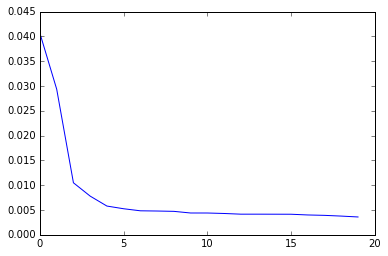

Index([u'image_ntags', u'aspect_ratio', u'script', u'crisp_sobel',
       u'bright_ctr8_numctrs8', u'u_bin51_nbins100', u'bright_ctr7_numctrs8',
       u'red_bin1_nbins120.1', u'red_bin1_nbins120', u'u_bin49_nbins100',
       u'bright_ctr6_numctrs8', u'bright_ctr3_numctrs3',
       u'bright_ctr5_numctrs8', u'v_bin49_nbins100', u'blue_bin1_nbins120',
       u'v_bin51_nbins100', u'v_bin52_nbins100', u'bright_ctr1_numctrs8',
       u'bright_ctr3_numctrs8', u'u_bin52_nbins100'],
      dtype='object')


In [26]:
plt.plot(feature_im[idx_sort])
plt.show()
print feature_names[idx_sort]

In [218]:
def plot_features(model, X_train, n=10, title=None, savename='FeaturePlot.png', color_p='custom', figsize=(10, 8)):
    feature_im = model_class_all_cats.feature_importances_
    feature_names = X_train.columns.values
    # Rename Laplace Feature as Neccessary:
    feature_names[feature_names == 'script']='crisp_laplace'
    idx_sort = np.argsort(feature_im)[::-1][:n]
    plt.figure(figsize=figsize, dpi=300)
    
    vals = feature_im[idx_sort]
    pos = range(1,n+1,1)
    pos_ticks = [i-0.1 for i in pos]
    
    if color_p != 'plain':
        color=[np.array([255., 51., 153.]),
               np.array([255., 51., 255.]),
               np.array([153., 51., 255.]),
               np.array([51., 51., 255.]),
               np.array([51., 153., 255.]),
               np.array([51., 255., 255.]),
               np.array([51., 255., 153]),
               np.array([51., 255., 51.]),
               np.array([153., 255., 51.]),
               np.array([255., 255., 51.])]

        color = [tuple(arr/255) for arr in color]
    else:
        color = (51./255, 51./255, 255./255)

    plt.bar(pos, vals, 0.5, 0, color=color)

    if n <=15:
        x_ticks = plt.xticks(pos_ticks, feature_names[idx_sort], rotation=70, fontsize=15)
        ticks = plt.gca().get_xticklabels()
#     [i.set_color(j) for i, j in zip(ticks, color)]

    plt.title('Feature Importances', fontsize=30)
    plt.xlabel("Features", fontsize=20)
    plt.ylabel("Feature Importances (%)", fontsize=20)
    plt.xlim((0, n+1))

    if title is not None:
        plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.savefig(savename, frameon=True, transparent=False, format='png')

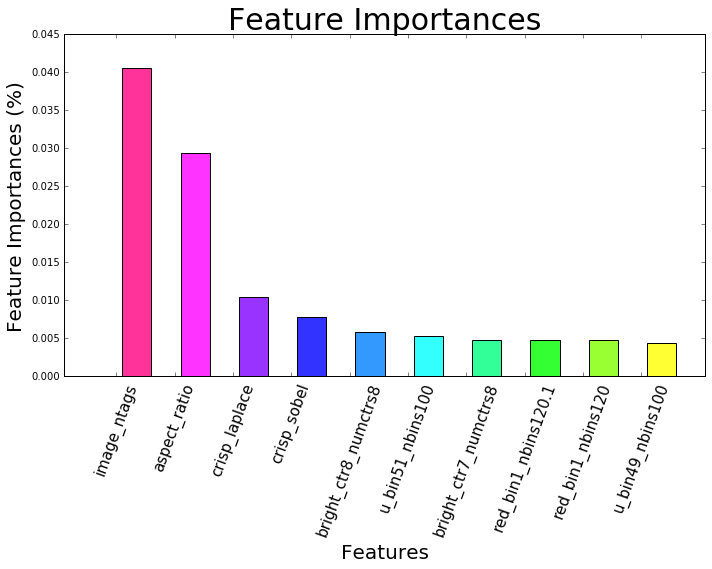

In [219]:
plot_features(model_class_all_cats, X_train, savename='visuals/All_Categories_Classification_Feature_Importances.png')

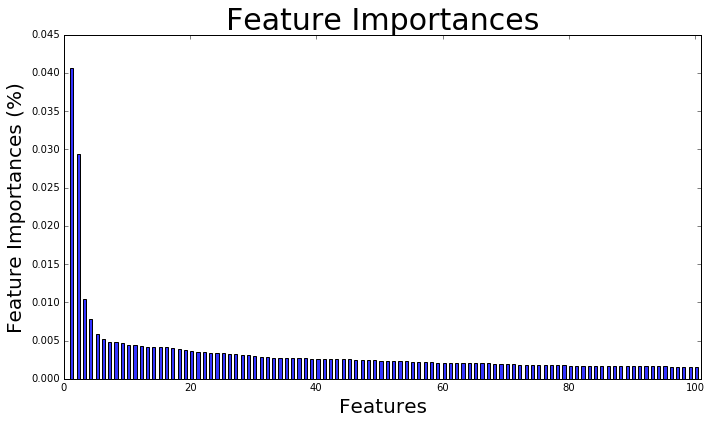

In [221]:
plot_features(model_class_all_cats, X_train, n=100, color_p='plain', figsize=(10, 6), savename='visuals/All_Categories_Classification_Feature_Importances_all.png')

### CONFUSION MATRIX SCORES

In [222]:
model_class_all_cats.score(X_test, y_test['image_views_quantized'])

0.52645742622157721

In [232]:
y_pred = model_class_all_cats.predict(X_test)
y_true = y_test['image_views_quantized']

In [233]:
print "F1: ", f1_score(y_true, y_pred, average='weighted')
print "Acc: ", accuracy_score(y_true, y_pred)
print "Precision: ", precision_score(y_true, y_pred, average='weighted')
print "Recall: ", recall_score(y_true, y_pred, average='weighted')

F1:  0.524596918777
Acc:  0.526457426222
Precision:  0.524725868949
Recall:  0.526457426222


In [311]:
def calc_acc_values(y_true, y_pred):
    y_true = y_true.values
    values = np.unique(np.array(y_true))
    acc_scores = []
    for value in list(values):
        count_realpos = sum(y_true == value)
        predictions = y_pred[y_true == value]
        count_truepos = sum(predictions == value)
        acc = count_truepos / float(count_realpos)
        acc_scores.append(acc)
    return acc_scores

In [338]:
y_prob = model_class_all_cats.predict_proba(X_test)
model_class_all_cats.classes_

array([1, 2, 3, 4, 5])

In [355]:
for val in model_class_all_cats.classes_:
    true_arr = np.apply_along_axis(lambda x: 1 if x else 0, axis=-1, arr=(y_true.values==val))
    pre_arr, rec_arr, thresholds = precision_recall_curve(true_arr, y_prob[:,val-1])
    plt.plot(1- pre_arr, rec_arr)
plt.legend([str(i) for i in model_class_all_cats.classes_])
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [359]:
np.apply_along_axis(lambda x: 1 if x else 0, axis=1, arr=(y_true.values==1))

ValueError: axis must be less than arr.ndim; axis=1, rank=1.

In [360]:
X_train.shape

(132286, 1089)